In [0]:
import pandas as pd
import seaborn as sb
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/My Drive/Tesis/Consolidado.csv',sep=';',encoding='latin-1')


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,5,6,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.columns

Index(['FECHA', 'do_tramite', 'TIPO_PRODUCTO', 'MONTO_CREDITO',
       'RANGO_MONTO_CREDITO', 'Clase_Cartera', 'REGIONAL', 'OFICINA',
       'SECTOR_U_R', 'IND_AGRO',
       ...
       'PROPIA', 'FAMILIAR', 'ALQUILADA', 'ARRENDADA/EMPEÑO',
       'ASIGNADA POR LA EMPRESA', 'VENTAS', 'RVENTAS', 'Unnamed: 159',
       'Unnamed: 160', '6638129.276'],
      dtype='object', length=162)

In [0]:
#df=df.loc[:,('IND_AGRO','Promedio_Ahorro_6M','Cant_Renovaciones_12M','SALDO_CAST_MICRO',
#'TIPO_CLIENTE',	'Puntaje_SGM_6','Puntaje_SGM_0','Acierta0','Acierta6_Atras','PEOR_CALIF_CONSUMO','PEOR_CALIF_MICRO','cambio_SGM'
#             ,'Cambio_Acierta','BACHILLERATO INCOMPLETO','TECNICO','BACHILLERATO','UNIVERSITARIO',
#                               'TECNOLOGICO','NINGUNO','PRIMARIA INCOMPLETA','MAESTRIA','ESPECIALIZACION','PREESCOLAR','POSTGRADO','OTROS ESTUDIOS',
#                               'INCONSISTENCIAS','DOCTORADO','NUM_PERSONAS_A_CARGO','NUMERO_HIJOS','PROPIA','FAMILIAR','ALQUILADA',
#                               'ARRENDADA/EMPEÑO','ASIGNADA POR LA EMPRESA','VENTAS','PRIMARIA','GENERO','ESTRATO','DIVORCIADO',
#                               'VIUDO','UNION LIBRE','SOLTERO','CASADO','SEPARADO','EDAD','BAD_RATE_6')]

In [0]:
df=df.loc[:,('IND_AGRO','Promedio_Ahorro_6M','Cant_Renovaciones_12M','SALDO_CAST_MICRO',
'TIPO_CLIENTE',	'Puntaje_SGM_6','Puntaje_SGM_0','Acierta0','Acierta6_Atras','PEOR_CALIF_CONSUMO','PEOR_CALIF_MICRO','cambio_SGM'
             ,'Cambio_Acierta','NIVEL_ESTUDIO','NUM_PERSONAS_A_CARGO','NUMERO_HIJOS','TIPO_VIVIENDA','VENTAS','GENERO','ESTRATO','ESTADO_CIVIL','EDAD','BAD_RATE_6')]

In [0]:
df['ESTRATO']=df['ESTRATO'].astype(str)
dummies_var=['NIVEL_ESTUDIO','ESTADO_CIVIL','TIPO_VIVIENDA','ESTRATO']
cat_var=pd.DataFrame(['IND_AGRO','TIPO_CLIENTE'])
num_var=['Promedio_Ahorro_6M','Cant_Renovaciones_12M','SALDO_CAST_MICRO',	'Puntaje_SGM_6','Puntaje_SGM_0','Acierta0','Acierta6_Atras','PEOR_CALIF_CONSUMO','PEOR_CALIF_MICRO','cambio_SGM'
             ,'Cambio_Acierta','NUM_PERSONAS_A_CARGO','NUMERO_HIJOS','VENTAS','EDAD','BAD_RATE_6']
num_df=df[num_var]
dummies_df = pd.get_dummies(df[dummies_var])
new_dummies=pd.DataFrame(dummies_df.columns)
final_cat=pd.concat([cat_var,new_dummies],axis=0,ignore_index=True)
#final_cat

In [8]:
dummies_df[num_var]=df[num_var]
cat_faltantes=['IND_AGRO','TIPO_CLIENTE']
dummies_df[cat_faltantes]=df[cat_faltantes]
dummies_df.head()

,NIVEL_ESTUDIO_BACHILLERATO,NIVEL_ESTUDIO_BACHILLERATO INCOMPLETO,NIVEL_ESTUDIO_DOCTORADO,NIVEL_ESTUDIO_ESPECIALIZACION,NIVEL_ESTUDIO_INCONSISTENCIAS,NIVEL_ESTUDIO_MAESTRIA,NIVEL_ESTUDIO_NINGUNO,NIVEL_ESTUDIO_OTROS ESTUDIOS,NIVEL_ESTUDIO_POSTGRADO,NIVEL_ESTUDIO_PREESCOLAR,NIVEL_ESTUDIO_PRIMARIA,NIVEL_ESTUDIO_PRIMARIA INCOMPLETA,NIVEL_ESTUDIO_TECNICO,NIVEL_ESTUDIO_TECNOLOGICO,NIVEL_ESTUDIO_UNIVERSITARIO,ESTADO_CIVIL_CASADO,ESTADO_CIVIL_DIVORCIADO,ESTADO_CIVIL_SEPARADO,ESTADO_CIVIL_SOLTERO,ESTADO_CIVIL_UNION LIBRE,ESTADO_CIVIL_VIUDO,TIPO_VIVIENDA_ALQUILADA,TIPO_VIVIENDA_ARRENDADA/EMPEÑO,TIPO_VIVIENDA_ASIGNADA POR LA EMPRESA,TIPO_VIVIENDA_FAMILIAR,TIPO_VIVIENDA_PROPIA,ESTRATO_0,ESTRATO_1,ESTRATO_2,ESTRATO_3,ESTRATO_4,ESTRATO_5,ESTRATO_6,ESTRATO_7,Promedio_Ahorro_6M,Cant_Renovaciones_12M,SALDO_CAST_MICRO,Puntaje_SGM_6,Puntaje_SGM_0,Acierta0,Acierta6_Atras,PEOR_CALIF_CONSUMO,PEOR_CALIF_MICRO,cambio_SGM,Cambio_Acierta,NUM_PERSONAS_A_CARGO,NUMERO_HIJOS,VENTAS,EDAD,BAD_RATE_6,IND_AGRO,TIPO_CLIENTE
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,19911.105,2,0,29.34,29.34,957,975,0,0,0.00,18,0,0,1918333.33,31,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,11.035,0,0,55.76,55.06,889,943,1,0,-0.70,54,0,0,13500000.00,32,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,126702.265,0,0,0.00,36.31,841,817,0,0,36.31,-24,2,3,13504977.50,31,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,12975.285,0,0,25.64,25.64,797,718,1,0,0.00,-79,0,0,10316667.00,30,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,3371.890,0,0,0.00,31.89,845,776,1,1,31.89,-69,2,2,2785704.91,40,0,0,0


In [9]:
dummies_df.columns#.isna().sum()

Index(['NIVEL_ESTUDIO_BACHILLERATO', 'NIVEL_ESTUDIO_BACHILLERATO INCOMPLETO',
       'NIVEL_ESTUDIO_DOCTORADO', 'NIVEL_ESTUDIO_ESPECIALIZACION',
       'NIVEL_ESTUDIO_INCONSISTENCIAS', 'NIVEL_ESTUDIO_MAESTRIA',
       'NIVEL_ESTUDIO_NINGUNO', 'NIVEL_ESTUDIO_OTROS ESTUDIOS',
       'NIVEL_ESTUDIO_POSTGRADO', 'NIVEL_ESTUDIO_PREESCOLAR',
       'NIVEL_ESTUDIO_PRIMARIA', 'NIVEL_ESTUDIO_PRIMARIA INCOMPLETA',
       'NIVEL_ESTUDIO_TECNICO', 'NIVEL_ESTUDIO_TECNOLOGICO',
       'NIVEL_ESTUDIO_UNIVERSITARIO', 'ESTADO_CIVIL_CASADO',
       'ESTADO_CIVIL_DIVORCIADO', 'ESTADO_CIVIL_SEPARADO',
       'ESTADO_CIVIL_SOLTERO', 'ESTADO_CIVIL_UNION LIBRE',
       'ESTADO_CIVIL_VIUDO', 'TIPO_VIVIENDA_ALQUILADA',
       'TIPO_VIVIENDA_ARRENDADA/EMPEÑO',
       'TIPO_VIVIENDA_ASIGNADA POR LA EMPRESA', 'TIPO_VIVIENDA_FAMILIAR',
       'TIPO_VIVIENDA_PROPIA', 'ESTRATO_0', 'ESTRATO_1', 'ESTRATO_2',
       'ESTRATO_3', 'ESTRATO_4', 'ESTRATO_5', 'ESTRATO_6', 'ESTRATO_7',
       'Promedio_Ahorro_6M', 'Cant_Renov

In [65]:
len(dummies_df.columns)

52

In [0]:
X =df.iloc[:, 0:49]#0:84 
y = df['BAD_RATE_6']

In [12]:
###Cuantos 1 y 0 tiene la base
print('La base tiene: \n',y.value_counts(),'\n')

La base tiene: 
 0    760501
1     73531
Name: BAD_RATE_6, dtype: int64 



Se observa que existe un desbalance ya que se tiene 9.67% de default lo que puede llevar a pensar en balancear la base.

Los supuestos de la regresión logistica son:

1. Binary logistic regression requires the dependent variable to be binary and ordinal logistic
regression requires the dependent variable to be ordinal. Reducing an ordinal or even metric
variable to dichotomous level loses a lot of information, which makes this test inferior compared to
ordinal logistic regression in these cases.

2. Secondly, since logistic regression assumes that P(Y=1) is the probability of the event occurring, it
is necessary that the dependent variable is coded accordingly. That is, for a binary regression, the
factor level 1 of the dependent variable should represent the desired outcome.

3. Thirdly, the model should be fitted correctly. Neither over fitting nor under fitting should occur.
That is only the meaningful variables should be included, but also all meaningful variables should
be included. A good approach to ensure this is to use a stepwise method to estimate the logistic
regression.

4. Fourthly, the error terms need to be independent. Logistic regression requires each observation to
be independent. That is that the data-points should not be from any dependent samples design,
e.g., before-after measurements, or matched pairings. Also the model should have little or no
multicollinearity. That is that the independent variables should be independent from each other.
However, there is the option to include interaction effects of categorical variables in the analysis
and the model. If multicollinearity is present centering the variables might resolve the issue, i.e.
deducting the mean of each variable. If this does not lower the multicollinearity, a factor analysis
with orthogonally rotated factors should be done before the logistic regression is estimated.

5. Fifthly, logistic regression assumes linearity of independent variables and log odds. Whilst it does
not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds. Otherwise the test underestimates the
strength of the relationship and rejects the relationship too easily, that is being not significant (not
rejecting the null hypothesis) where it should be significant. A solution to this problem is the
categorization of the independent variables. That is transforming metric variables to ordinal level
and then including them in the model. Another approach would be to use discriminant analysis, if
the assumptions of homoscedasticity, multivariate normality, and absence of multicollinearity are
met.

6. Lastly, it requires quite large sample sizes. Because maximum likelihood estimates are less
powerful than ordinary least squares (e.g., simple linear regression, multiple linear regression);
whilst OLS needs 5 cases per independent variable in the analysis, ML needs at least 10 cases per
independent variable, some statisticians recommend at least 30 cases for each parameter to be
estimated.


https://www.statisticssolutions.com/wp-content/uploads/wp-post-to-pdf-enhanced-cache/1/assumptions-of-logistic-regression.pdf

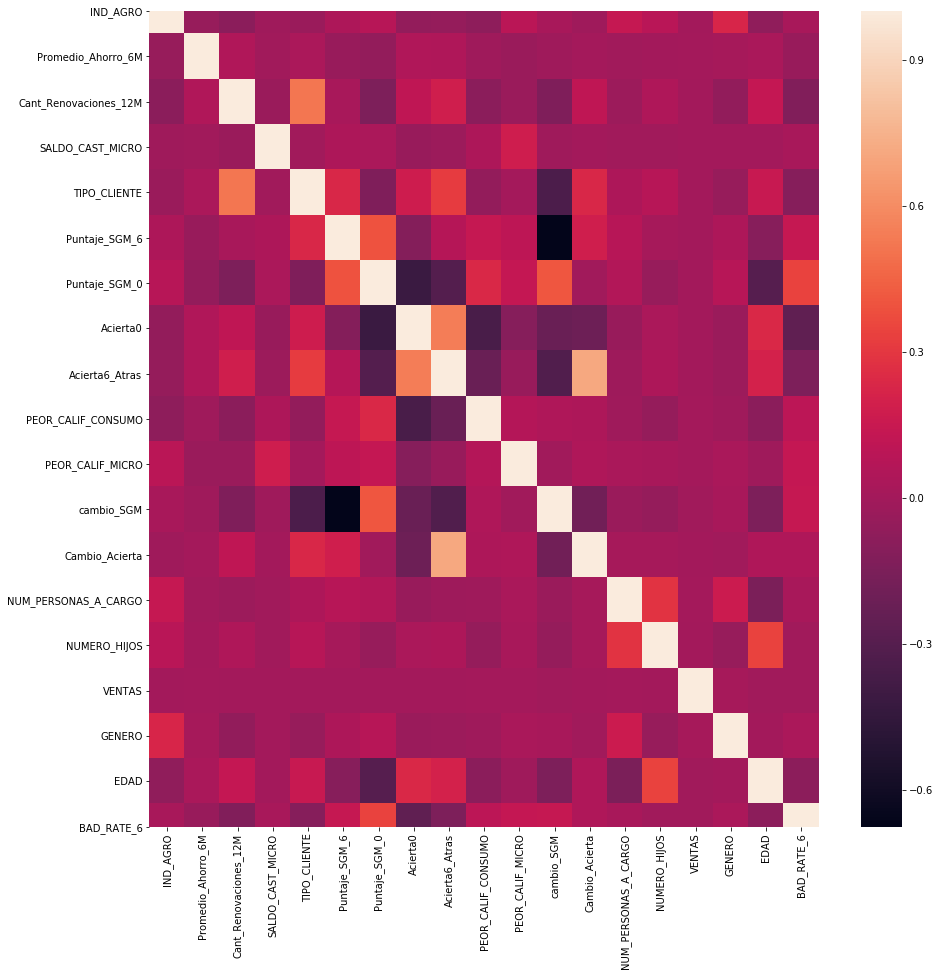

In [13]:
#sb.heatmap(X.corr())
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sb.heatmap(X.corr(),ax=ax)# annot=True, linewidths=.5, ax=ax)

In [14]:
### VIF test para multicolinealidad
###Si VIF <5 no hay multicolinealidad

def vif_cal(input_data, dependent_col):
  import statsmodels.formula.api as sm
  x_vars=input_data.drop(dependent_col,axis=1)
  xvar_names=x_vars.columns
  for i in range(0, xvar_names.shape[0]):
    y=x_vars[xvar_names[i]]
    x=x_vars[xvar_names.drop(xvar_names[i])]
    rsq=sm.ols(formula="y~x",data=x_vars).fit().rsquared
    vif=round(1/(1-rsq),2)
    print(xvar_names[i]," VIF = ",vif)
    
    
vif_cal(num_df,'BAD_RATE_6')

Promedio_Ahorro_6M  VIF =  1.01
Cant_Renovaciones_12M  VIF =  1.06
SALDO_CAST_MICRO  VIF =  1.03


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Puntaje_SGM_6  VIF =  inf
Puntaje_SGM_0  VIF =  inf
Acierta0  VIF =  inf
Acierta6_Atras  VIF =  inf
PEOR_CALIF_CONSUMO  VIF =  1.17
PEOR_CALIF_MICRO  VIF =  1.06
cambio_SGM  VIF =  inf
Cambio_Acierta  VIF =  inf
NUM_PERSONAS_A_CARGO  VIF =  1.18
NUMERO_HIJOS  VIF =  1.31
VENTAS  VIF =  1.0
EDAD  VIF =  1.37


In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def multicollinearity_check(X, thresh=5.0):
    data_type = X.dtypes
    # print(type(data_type))
    int_cols = \
    X.select_dtypes(include=['int', 'int16', 'int32', 'int64', 'float', 'float16', 'float32', 'float64']).shape[1]
    total_cols = X.shape[1]
    try:
        if int_cols != total_cols:
            raise Exception('All the columns should be integer or float, for multicollinearity test.')
        else:
            variables = list(range(X.shape[1]))
            dropped = True
            print('''\n\nThe VIF calculator will now iterate through the features and calculate their respective values.
            It shall continue dropping the highest VIF features until all the features have VIF less than the threshold of 5.\n\n''')
            while dropped:
                dropped = False
                vif = [variance_inflation_factor(X.iloc[:, variables].values, ix) for ix in variables]
                print('\n\nvif is: ', vif)
                maxloc = vif.index(max(vif))
                if max(vif) > thresh:
                    print('dropping \'' + X.iloc[:, variables].columns[maxloc] + '\' at index: ' + str(maxloc))
                    # del variables[maxloc]
                    X.drop(X.columns[variables[maxloc]], 1, inplace=True)
                    variables = list(range(X.shape[1]))
                    dropped = True

            print('\n\nRemaining variables:\n')
            print(X.columns[variables])
            # return X.iloc[:,variables]
            return X
    except Exception as e:
        print('Error caught: ', e)

In [0]:
#multicollinearity_check(num_df.drop(['BAD_RATE_6'],axis=1))

In [0]:
#num_df=num_df.loc[:,['Promedio_Ahorro_6M', 'Cant_Renovaciones_12M', 'SALDO_CAST_MICRO','Puntaje_SGM_0', 'PEOR_CALIF_CONSUMO', 'PEOR_CALIF_MICRO', 'cambio_SGM','Cambio_Acierta', 'NUM_PERSONAS_A_CARGO', 'NUMERO_HIJOS', 'VENTAS']]

In [0]:
df=pd.DataFrame()
df[num_df.columns]=num_df
cat=['NIVEL_ESTUDIO_BACHILLERATO','NIVEL_ESTUDIO_BACHILLERATO INCOMPLETO','NIVEL_ESTUDIO_DOCTORADO','NIVEL_ESTUDIO_ESPECIALIZACION','NIVEL_ESTUDIO_INCONSISTENCIAS','NIVEL_ESTUDIO_MAESTRIA','NIVEL_ESTUDIO_NINGUNO','NIVEL_ESTUDIO_OTROS ESTUDIOS','NIVEL_ESTUDIO_POSTGRADO','NIVEL_ESTUDIO_PREESCOLAR','NIVEL_ESTUDIO_PRIMARIA','NIVEL_ESTUDIO_PRIMARIA INCOMPLETA','NIVEL_ESTUDIO_TECNICO','NIVEL_ESTUDIO_TECNOLOGICO','NIVEL_ESTUDIO_UNIVERSITARIO','ESTADO_CIVIL_CASADO','ESTADO_CIVIL_DIVORCIADO','ESTADO_CIVIL_SEPARADO','ESTADO_CIVIL_SOLTERO','ESTADO_CIVIL_UNION LIBRE','ESTADO_CIVIL_VIUDO','TIPO_VIVIENDA_ALQUILADA','TIPO_VIVIENDA_ARRENDADA/EMPEÑO','TIPO_VIVIENDA_ASIGNADA POR LA EMPRESA','TIPO_VIVIENDA_FAMILIAR','TIPO_VIVIENDA_PROPIA','ESTRATO_0','ESTRATO_1','ESTRATO_2','ESTRATO_3','ESTRATO_4','ESTRATO_5','ESTRATO_6','ESTRATO_7','Promedio_Ahorro_6M','Cant_Renovaciones_12M','SALDO_CAST_MICRO','Puntaje_SGM_6','Puntaje_SGM_0','Acierta0','Acierta6_Atras','PEOR_CALIF_CONSUMO','PEOR_CALIF_MICRO','cambio_SGM','Cambio_Acierta','NUM_PERSONAS_A_CARGO','NUMERO_HIJOS','VENTAS','EDAD','BAD_RATE_6','IND_AGRO','TIPO_CLIENTE']
df['BAD_RATE_6']=dummies_df['BAD_RATE_6']
df[cat]=dummies_df[cat]

In [19]:
df.head()

,Promedio_Ahorro_6M,Cant_Renovaciones_12M,SALDO_CAST_MICRO,Puntaje_SGM_6,Puntaje_SGM_0,Acierta0,Acierta6_Atras,PEOR_CALIF_CONSUMO,PEOR_CALIF_MICRO,cambio_SGM,Cambio_Acierta,NUM_PERSONAS_A_CARGO,NUMERO_HIJOS,VENTAS,EDAD,BAD_RATE_6,NIVEL_ESTUDIO_BACHILLERATO,NIVEL_ESTUDIO_BACHILLERATO INCOMPLETO,NIVEL_ESTUDIO_DOCTORADO,NIVEL_ESTUDIO_ESPECIALIZACION,NIVEL_ESTUDIO_INCONSISTENCIAS,NIVEL_ESTUDIO_MAESTRIA,NIVEL_ESTUDIO_NINGUNO,NIVEL_ESTUDIO_OTROS ESTUDIOS,NIVEL_ESTUDIO_POSTGRADO,NIVEL_ESTUDIO_PREESCOLAR,NIVEL_ESTUDIO_PRIMARIA,NIVEL_ESTUDIO_PRIMARIA INCOMPLETA,NIVEL_ESTUDIO_TECNICO,NIVEL_ESTUDIO_TECNOLOGICO,NIVEL_ESTUDIO_UNIVERSITARIO,ESTADO_CIVIL_CASADO,ESTADO_CIVIL_DIVORCIADO,ESTADO_CIVIL_SEPARADO,ESTADO_CIVIL_SOLTERO,ESTADO_CIVIL_UNION LIBRE,ESTADO_CIVIL_VIUDO,TIPO_VIVIENDA_ALQUILADA,TIPO_VIVIENDA_ARRENDADA/EMPEÑO,TIPO_VIVIENDA_ASIGNADA POR LA EMPRESA,TIPO_VIVIENDA_FAMILIAR,TIPO_VIVIENDA_PROPIA,ESTRATO_0,ESTRATO_1,ESTRATO_2,ESTRATO_3,ESTRATO_4,ESTRATO_5,ESTRATO_6,ESTRATO_7,IND_AGRO,TIPO_CLIENTE
0,19911.105,2,0,29.34,29.34,957,975,0,0,0.00,18,0,0,1918333.33,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,11.035,0,0,55.76,55.06,889,943,1,0,-0.70,54,0,0,13500000.00,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,126702.265,0,0,0.00,36.31,841,817,0,0,36.31,-24,2,3,13504977.50,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,12975.285,0,0,25.64,25.64,797,718,1,0,0.00,-79,0,0,10316667.00,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,3371.890,0,0,0.00,31.89,845,776,1,1,31.89,-69,2,2,2785704.91,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [0]:
X =df.drop(['BAD_RATE_6'],axis=1)#0:84 
y = df['BAD_RATE_6']

# Modelo Inicial

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("La base de entrenamiento tiene:",len(X_train))
print("La base de test tiene:",len(X_test))
print("La base de total tiene:",len(df))

La base de entrenamiento tiene: 558801
La base de test tiene: 275231
La base de total tiene: 834032


In [0]:
from sklearn.metrics import classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [23]:
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)
X_train['default_pred'] = logreg.predict(X_train)#test[feature_cols])
X_test['default_pred']=logreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [24]:
print('Predicciones:\n')
print('Base de train: \n',X_train['default_pred'].value_counts(),'\n')
print('Base de test: \n',X_test['default_pred'].value_counts(),'\n')

print('Los datos originales tienen \n',y.value_counts(),'\n')


Predicciones:

Base de train: 
 0    558775
1        26
Name: default_pred, dtype: int64 

Base de test: 
 0    275221
1        10
Name: default_pred, dtype: int64 

Los datos originales tienen 
 0    760501
1     73531
Name: BAD_RATE_6, dtype: int64 



In [25]:
print('matriz de confusión train:')
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, X_train['default_pred'])

matriz de confusión train:


array([[509649,     21],
       [ 49126,      5]])

In [26]:
print('matriz de confusión test:')
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, X_test['default_pred'])

matriz de confusión test:


array([[250826,      5],
       [ 24395,      5]])

In [27]:
### Reporte de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test,X_test['default_pred']))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95    250831
           1       0.50      0.00      0.00     24400

    accuracy                           0.91    275231
   macro avg       0.71      0.50      0.48    275231
weighted avg       0.87      0.91      0.87    275231



# Modelo con escala de datos

In [28]:
#dummies=['IND_AGRO','TIPO_CLIENTE','BACHILLERATO INCOMPLETO','TECNICO','BACHILLERATO','UNIVERSITARIO','TECNOLOGICO','NINGUNO'
#         ,'PRIMARIA INCOMPLETA','MAESTRIA','ESPECIALIZACION','PREESCOLAR','POSTGRADO','OTROS ESTUDIOS','INCONSISTENCIAS'
#         ,'DOCTORADO','PROPIA','FAMILIAR','ALQUILADA','ARRENDADA/EMPEÑO','ASIGNADA POR LA EMPRESA','PRIMARIA','GENERO',
#         'DIVORCIADO','VIUDO','UNION LIBRE','SOLTERO','CASADO','SEPARADO','BAD_RATE_6']

num_df=df[num_df.columns]#.drop(dummies, axis=1)
dummie_df=df[cat]


from sklearn.preprocessing import MinMaxScaler #StandardScaler#
scaler = MinMaxScaler()#StandardScaler()
scaled_df=scaler.fit_transform(df[num_df.columns])
scaled_df = pd.DataFrame(scaled_df, columns=num_df.columns)
scaled_df.head()


,Promedio_Ahorro_6M,Cant_Renovaciones_12M,SALDO_CAST_MICRO,Puntaje_SGM_6,Puntaje_SGM_0,Acierta0,Acierta6_Atras,PEOR_CALIF_CONSUMO,PEOR_CALIF_MICRO,cambio_SGM,Cambio_Acierta,NUM_PERSONAS_A_CARGO,NUMERO_HIJOS,VENTAS,EDAD,BAD_RATE_6
0,1.804395e-04,0.285714,0.0,0.307032,0.306071,0.957958,0.975976,0.0,0.0,0.361359,0.521004,0.000000,0.000000,0.000956,0.206349,0.0
1,1.000020e-07,0.000000,0.0,0.583508,0.574379,0.889890,0.943944,0.2,0.0,0.356696,0.539447,0.000000,0.000000,0.001197,0.222222,0.0
2,1.148208e-03,0.000000,0.0,0.000000,0.378782,0.841842,0.817818,0.0,0.0,0.603264,0.499488,0.018018,0.083333,0.001197,0.206349,0.0
3,1.175854e-04,0.000000,0.0,0.268313,0.267473,0.797798,0.718719,0.2,0.0,0.361359,0.471311,0.000000,0.000000,0.001131,0.190476,0.0
4,3.055693e-05,0.000000,0.0,0.000000,0.332673,0.845846,0.776777,0.2,0.2,0.573817,0.476434,0.018018,0.055556,0.000974,0.349206,0.0


In [29]:
X =df.drop(['BAD_RATE_6'],axis=1)#df.iloc[:, 0:45]#0:84 
y = df['BAD_RATE_6']
X[num_df.columns]=scaled_df[num_df.columns]
X=X.drop(['BAD_RATE_6'],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("La base de entrenamiento tiene:",len(X_train))
print("La base de test tiene:",len(X_test))
print("La base de total tiene:",len(df))


La base de entrenamiento tiene: 558801
La base de test tiene: 275231
La base de total tiene: 834032


In [30]:
X_train.head()

,Promedio_Ahorro_6M,Cant_Renovaciones_12M,SALDO_CAST_MICRO,Puntaje_SGM_6,Puntaje_SGM_0,Acierta0,Acierta6_Atras,PEOR_CALIF_CONSUMO,PEOR_CALIF_MICRO,cambio_SGM,Cambio_Acierta,NUM_PERSONAS_A_CARGO,NUMERO_HIJOS,VENTAS,EDAD,NIVEL_ESTUDIO_BACHILLERATO,NIVEL_ESTUDIO_BACHILLERATO INCOMPLETO,NIVEL_ESTUDIO_DOCTORADO,NIVEL_ESTUDIO_ESPECIALIZACION,NIVEL_ESTUDIO_INCONSISTENCIAS,NIVEL_ESTUDIO_MAESTRIA,NIVEL_ESTUDIO_NINGUNO,NIVEL_ESTUDIO_OTROS ESTUDIOS,NIVEL_ESTUDIO_POSTGRADO,NIVEL_ESTUDIO_PREESCOLAR,NIVEL_ESTUDIO_PRIMARIA,NIVEL_ESTUDIO_PRIMARIA INCOMPLETA,NIVEL_ESTUDIO_TECNICO,NIVEL_ESTUDIO_TECNOLOGICO,NIVEL_ESTUDIO_UNIVERSITARIO,ESTADO_CIVIL_CASADO,ESTADO_CIVIL_DIVORCIADO,ESTADO_CIVIL_SEPARADO,ESTADO_CIVIL_SOLTERO,ESTADO_CIVIL_UNION LIBRE,ESTADO_CIVIL_VIUDO,TIPO_VIVIENDA_ALQUILADA,TIPO_VIVIENDA_ARRENDADA/EMPEÑO,TIPO_VIVIENDA_ASIGNADA POR LA EMPRESA,TIPO_VIVIENDA_FAMILIAR,TIPO_VIVIENDA_PROPIA,ESTRATO_0,ESTRATO_1,ESTRATO_2,ESTRATO_3,ESTRATO_4,ESTRATO_5,ESTRATO_6,ESTRATO_7,IND_AGRO,TIPO_CLIENTE
536505,3.629283e-07,0.000000,0.0,0.235873,0.180263,0.899900,0.909910,0.0,0.2,0.326316,0.516906,0.000000,0.027778,0.001036,0.714286,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
503964,2.688288e-03,0.142857,0.0,0.000000,0.233570,1.000000,0.944945,0.2,0.0,0.510526,0.483607,0.009009,0.027778,0.000937,0.936508,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
79892,2.561271e-04,0.142857,0.0,0.000000,0.432610,0.813814,0.776777,0.2,0.0,0.637642,0.492828,0.009009,0.027778,0.001058,0.523810,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
379911,1.146365e-04,0.142857,0.0,0.234931,0.234196,0.959960,0.898899,0.2,0.0,0.361359,0.480533,0.009009,0.111111,0.000991,0.888889,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
422345,1.340759e-04,0.142857,0.0,0.414190,0.398289,0.709710,0.717718,0.2,0.0,0.352032,0.515881,0.027027,0.083333,0.001099,0.539683,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1


In [31]:
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)
X_train_default_pred = pd.Series(logreg.predict(X_train))#test[feature_cols])
X_test_default_pred=pd.Series(logreg.predict(X_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [32]:
print('Predicciones:\n')
print('Base de train: \n',X_train_default_pred.value_counts(),'\n')
print('Base de test: \n',X_test_default_pred.value_counts(),'\n')

print('Los datos originales tienen \n',y.value_counts(),'\n')

Predicciones:

Base de train: 
 0    545771
1     13030
dtype: int64 

Base de test: 
 0    268506
1      6725
dtype: int64 

Los datos originales tienen 
 0    760501
1     73531
Name: BAD_RATE_6, dtype: int64 



In [33]:
print('matriz de confusión train:')
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, X_train_default_pred)

matriz de confusión train:


array([[504126,   5544],
       [ 41645,   7486]])

In [34]:
print('matriz de confusión test:')
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, X_test_default_pred)

matriz de confusión test:


array([[247959,   2872],
       [ 20547,   3853]])

In [35]:
### Reporte de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test,X_test_default_pred))
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, X_test_default_pred)
acc = accuracy_score(y_test, X_test_default_pred)
prec = precision_score(y_test, X_test_default_pred)
rec = recall_score(y_test, X_test_default_pred)
f1 = f1_score(y_test, X_test_default_pred)

results = pd.DataFrame([['Logistic','Yes','In-Model', acc,prec,rec, f1,roc]],
               columns = ['Model','Scaled','Balanced', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

              precision    recall  f1-score   support

           0       0.92      0.99      0.95    250831
           1       0.57      0.16      0.25     24400

    accuracy                           0.91    275231
   macro avg       0.75      0.57      0.60    275231
weighted avg       0.89      0.91      0.89    275231



,Model,Scaled,Balanced,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic,Yes,In-Model,0.914911,0.572937,0.15791,0.247582,0.57323


In [36]:
pip install scikit-plot

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


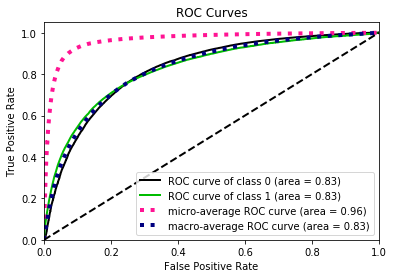

In [37]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(y_test, logreg.predict_proba(X_test))
plt.show()

## Con escala de datos y utilizando una regresión con desbalance de clases

In [38]:
X =df.drop(['BAD_RATE_6'],axis=1)#df.iloc[:, 0:45]#0:84 
y = df['BAD_RATE_6']
X[num_df.columns]=scaled_df[num_df.columns]
X=X.drop(['BAD_RATE_6'],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("La base de entrenamiento tiene:",len(X_train))
print("La base de test tiene:",len(X_test))
print("La base de total tiene:",len(df))


La base de entrenamiento tiene: 558801
La base de test tiene: 275231
La base de total tiene: 834032


In [39]:
logreg = LogisticRegression(solver='lbfgs',class_weight = 'balanced')
logreg.fit(X_train, y_train)
X_train_default_pred = pd.Series(logreg.predict(X_train))#test[feature_cols])
X_test_default_pred=pd.Series(logreg.predict(X_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [40]:
print('Predicciones:\n')
print('Base de train: \n',X_train_default_pred.value_counts(),'\n')
print('Base de test: \n',X_test_default_pred.value_counts(),'\n')

print('Los datos originales tienen \n',y.value_counts(),'\n')

Predicciones:

Base de train: 
 0    412212
1    146589
dtype: int64 

Base de test: 
 0    202933
1     72298
dtype: int64 

Los datos originales tienen 
 0    760501
1     73531
Name: BAD_RATE_6, dtype: int64 



In [41]:
print('matriz de confusión train:')
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, X_train_default_pred)

matriz de confusión train:


array([[398612, 111058],
       [ 13600,  35531]])

In [42]:
print('matriz de confusión test:')
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, X_test_default_pred)

matriz de confusión test:


array([[196307,  54524],
       [  6626,  17774]])

In [43]:
### Reporte de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test,X_test_default_pred))
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, X_test_default_pred)
acc = accuracy_score(y_test, X_test_default_pred)
prec = precision_score(y_test, X_test_default_pred)
rec = recall_score(y_test, X_test_default_pred)
f1 = f1_score(y_test, X_test_default_pred)

results = pd.DataFrame([['Logistic','Yes','In-Model', acc,prec,rec, f1,roc]],
               columns = ['Model','Scaled','Balanced', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

              precision    recall  f1-score   support

           0       0.97      0.78      0.87    250831
           1       0.25      0.73      0.37     24400

    accuracy                           0.78    275231
   macro avg       0.61      0.76      0.62    275231
weighted avg       0.90      0.78      0.82    275231



,Model,Scaled,Balanced,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic,Yes,In-Model,0.777823,0.245844,0.728443,0.367619,0.755535


## Modelo de Random Forest para la predicción

In [44]:
X =df.drop(['BAD_RATE_6'],axis=1)#df.iloc[:, 0:45]#0:84 
y = df['BAD_RATE_6']
X[num_df.columns]=scaled_df[num_df.columns]
X=X.drop(['BAD_RATE_6'],axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("La base de entrenamiento tiene:",len(X_train))
print("La base de test tiene:",len(X_test))
print("La base de total tiene:",len(df))


La base de entrenamiento tiene: 558801
La base de test tiene: 275231
La base de total tiene: 834032


In [45]:
X_train.head()

,Promedio_Ahorro_6M,Cant_Renovaciones_12M,SALDO_CAST_MICRO,Puntaje_SGM_6,Puntaje_SGM_0,Acierta0,Acierta6_Atras,PEOR_CALIF_CONSUMO,PEOR_CALIF_MICRO,cambio_SGM,Cambio_Acierta,NUM_PERSONAS_A_CARGO,NUMERO_HIJOS,VENTAS,EDAD,NIVEL_ESTUDIO_BACHILLERATO,NIVEL_ESTUDIO_BACHILLERATO INCOMPLETO,NIVEL_ESTUDIO_DOCTORADO,NIVEL_ESTUDIO_ESPECIALIZACION,NIVEL_ESTUDIO_INCONSISTENCIAS,NIVEL_ESTUDIO_MAESTRIA,NIVEL_ESTUDIO_NINGUNO,NIVEL_ESTUDIO_OTROS ESTUDIOS,NIVEL_ESTUDIO_POSTGRADO,NIVEL_ESTUDIO_PREESCOLAR,NIVEL_ESTUDIO_PRIMARIA,NIVEL_ESTUDIO_PRIMARIA INCOMPLETA,NIVEL_ESTUDIO_TECNICO,NIVEL_ESTUDIO_TECNOLOGICO,NIVEL_ESTUDIO_UNIVERSITARIO,ESTADO_CIVIL_CASADO,ESTADO_CIVIL_DIVORCIADO,ESTADO_CIVIL_SEPARADO,ESTADO_CIVIL_SOLTERO,ESTADO_CIVIL_UNION LIBRE,ESTADO_CIVIL_VIUDO,TIPO_VIVIENDA_ALQUILADA,TIPO_VIVIENDA_ARRENDADA/EMPEÑO,TIPO_VIVIENDA_ASIGNADA POR LA EMPRESA,TIPO_VIVIENDA_FAMILIAR,TIPO_VIVIENDA_PROPIA,ESTRATO_0,ESTRATO_1,ESTRATO_2,ESTRATO_3,ESTRATO_4,ESTRATO_5,ESTRATO_6,ESTRATO_7,IND_AGRO,TIPO_CLIENTE
536505,3.629283e-07,0.000000,0.0,0.235873,0.180263,0.899900,0.909910,0.0,0.2,0.326316,0.516906,0.000000,0.027778,0.001036,0.714286,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
503964,2.688288e-03,0.142857,0.0,0.000000,0.233570,1.000000,0.944945,0.2,0.0,0.510526,0.483607,0.009009,0.027778,0.000937,0.936508,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
79892,2.561271e-04,0.142857,0.0,0.000000,0.432610,0.813814,0.776777,0.2,0.0,0.637642,0.492828,0.009009,0.027778,0.001058,0.523810,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
379911,1.146365e-04,0.142857,0.0,0.234931,0.234196,0.959960,0.898899,0.2,0.0,0.361359,0.480533,0.009009,0.111111,0.000991,0.888889,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
422345,1.340759e-04,0.142857,0.0,0.414190,0.398289,0.709710,0.717718,0.2,0.0,0.352032,0.515881,0.027027,0.083333,0.001099,0.539683,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1


In [0]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
X_train_default_pred = pd.Series(rf.predict(X_train))#test[feature_cols])
X_test_default_pred=pd.Series(rf.predict(X_test))

In [47]:
print('Predicciones:\n')
print('Base de train: \n',X_train_default_pred.value_counts(),'\n')
print('Base de test: \n',X_test_default_pred.value_counts(),'\n')

print('Los datos originales tienen \n',y.value_counts(),'\n')

Predicciones:

Base de train: 
 0    509850
1     48951
dtype: int64 

Base de test: 
 0    265821
1      9410
dtype: int64 

Los datos originales tienen 
 0    760501
1     73531
Name: BAD_RATE_6, dtype: int64 



In [48]:
print('matriz de confusión train:')
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, X_train_default_pred)

matriz de confusión train:


array([[509635,     35],
       [   215,  48916]])

In [49]:
print('matriz de confusión test:')
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, X_test_default_pred)

matriz de confusión test:


array([[247687,   3144],
       [ 18134,   6266]])

In [50]:
### Reporte de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test,X_test_default_pred))
roc=roc_auc_score(y_test, X_test_default_pred)
acc = accuracy_score(y_test, X_test_default_pred)
prec = precision_score(y_test, X_test_default_pred)
rec = recall_score(y_test, X_test_default_pred)
f1 = f1_score(y_test, X_test_default_pred)

results = pd.DataFrame([['Random-Forest','Yes','No', acc,prec,rec, f1,roc]],
               columns = ['Model','Scaled','Balanced', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

              precision    recall  f1-score   support

           0       0.93      0.99      0.96    250831
           1       0.67      0.26      0.37     24400

    accuracy                           0.92    275231
   macro avg       0.80      0.62      0.66    275231
weighted avg       0.91      0.92      0.91    275231



,Model,Scaled,Balanced,Accuracy,Precision,Recall,F1 Score,ROC
0,Random-Forest,Yes,No,0.92269,0.665887,0.256803,0.37066,0.622134


In [51]:
pip install scikit-plot

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


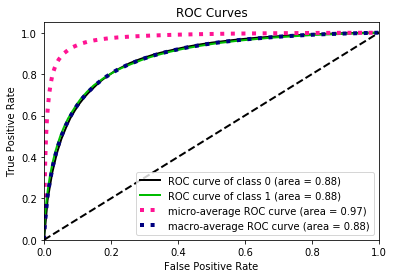

In [52]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(y_test, rf.predict_proba(X_test))
plt.show()

In [0]:
###Ahora se observará la importancia de las variables del random forest
#for name, importance in zip(X_test.columns, rf.feature_importances_):
#  print(name, "=", importance)

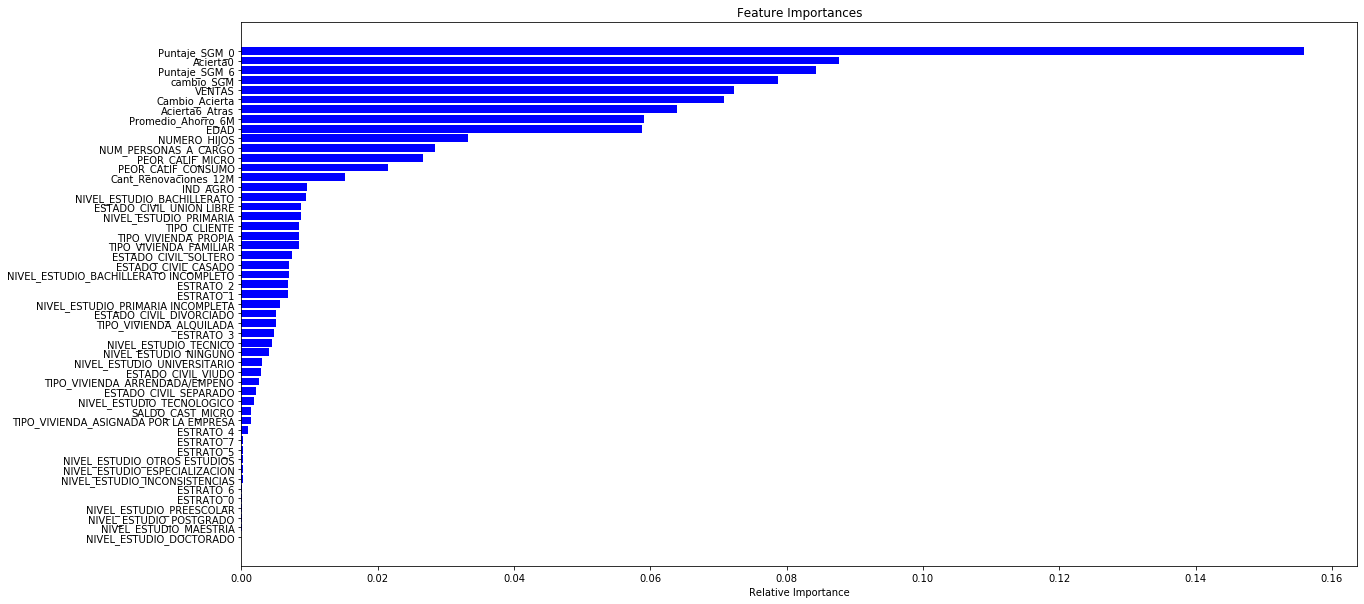

In [54]:
features = X_test.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [0]:
#### Intentar escalando únicamente Promedio_ahorro Saldo_castigo acierta0 acierta6
from sklearn.base import clone 

def drop_col_feat_imp(model, X_train, y_train, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    #importances_df = imp_df(X_train.columns, importances)
    return importances

In [0]:
#drop_importances = drop_col_feat_imp(rf,X_train,y_train)

In [0]:
#drop_importances

In [0]:
#drop_importances

In [0]:
#col=pd.DataFrame(drop_importances)

In [0]:
#from google.colab import files
#col.to_csv('filename.csv') 
#files.download('filename.csv')

In [0]:
#features = X_test.columns
#importances = drop_importances
#indices = np.argsort(importances)

#plt.figure(figsize=(20,10))
#plt.title('Feature Importances')
#plt.barh(range(len(indices)), importances[indices], color='b', align='center')
#plt.yticks(range(len(indices)), [features[i] for i in indices])
#plt.xlabel('Relative Importance')
#plt.show()

# Balanceando los datos

## UnderSampling

In [66]:
X_train.head()

,Promedio_Ahorro_6M,Cant_Renovaciones_12M,SALDO_CAST_MICRO,Puntaje_SGM_6,Puntaje_SGM_0,Acierta0,Acierta6_Atras,PEOR_CALIF_CONSUMO,PEOR_CALIF_MICRO,cambio_SGM,Cambio_Acierta,NUM_PERSONAS_A_CARGO,NUMERO_HIJOS,VENTAS,EDAD,NIVEL_ESTUDIO_BACHILLERATO,NIVEL_ESTUDIO_BACHILLERATO INCOMPLETO,NIVEL_ESTUDIO_DOCTORADO,NIVEL_ESTUDIO_ESPECIALIZACION,NIVEL_ESTUDIO_INCONSISTENCIAS,NIVEL_ESTUDIO_MAESTRIA,NIVEL_ESTUDIO_NINGUNO,NIVEL_ESTUDIO_OTROS ESTUDIOS,NIVEL_ESTUDIO_POSTGRADO,NIVEL_ESTUDIO_PREESCOLAR,NIVEL_ESTUDIO_PRIMARIA,NIVEL_ESTUDIO_PRIMARIA INCOMPLETA,NIVEL_ESTUDIO_TECNICO,NIVEL_ESTUDIO_TECNOLOGICO,NIVEL_ESTUDIO_UNIVERSITARIO,ESTADO_CIVIL_CASADO,ESTADO_CIVIL_DIVORCIADO,ESTADO_CIVIL_SEPARADO,ESTADO_CIVIL_SOLTERO,ESTADO_CIVIL_UNION LIBRE,ESTADO_CIVIL_VIUDO,TIPO_VIVIENDA_ALQUILADA,TIPO_VIVIENDA_ARRENDADA/EMPEÑO,TIPO_VIVIENDA_ASIGNADA POR LA EMPRESA,TIPO_VIVIENDA_FAMILIAR,TIPO_VIVIENDA_PROPIA,ESTRATO_0,ESTRATO_1,ESTRATO_2,ESTRATO_3,ESTRATO_4,ESTRATO_5,ESTRATO_6,ESTRATO_7,IND_AGRO,TIPO_CLIENTE
536505,3.629283e-07,0.000000,0.0,0.235873,0.180263,0.899900,0.909910,0.0,0.2,0.326316,0.516906,0.000000,0.027778,0.001036,0.714286,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
503964,2.688288e-03,0.142857,0.0,0.000000,0.233570,1.000000,0.944945,0.2,0.0,0.510526,0.483607,0.009009,0.027778,0.000937,0.936508,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
79892,2.561271e-04,0.142857,0.0,0.000000,0.432610,0.813814,0.776777,0.2,0.0,0.637642,0.492828,0.009009,0.027778,0.001058,0.523810,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
379911,1.146365e-04,0.142857,0.0,0.234931,0.234196,0.959960,0.898899,0.2,0.0,0.361359,0.480533,0.009009,0.111111,0.000991,0.888889,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
422345,1.340759e-04,0.142857,0.0,0.414190,0.398289,0.709710,0.717718,0.2,0.0,0.352032,0.515881,0.027027,0.083333,0.001099,0.539683,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [0]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

In [77]:
Metricas= pd.DataFrame(columns=[list(range(4))])
i=0
for target_percentage in [0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = UnderSampling(X_train, y_train, target_percentage, 42)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    logreg = LogisticRegression(solver='lbfgs',max_iter=500)
    rf = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1)
    #print('Muestras en cero:',(y_u == 0).sum())
    #print('Muestras en uno:',(y_u == 1).sum())
    logreg.fit(X_u, y_u)
    rf.fit(X_u, y_u)
    predicted_log=logreg.predict(X_test)
    predicted_rf=rf.predict(X_test)
    Metricas.loc[i]=('Logistic','F1',target_percentage,metrics.f1_score(y_test,predicted_log))
    i=i+1
    Metricas.loc[i]=('Logistic','Accuracy',target_percentage,metrics.accuracy_score(y_test,predicted_log))
    i=i+1
    Metricas.loc[i]=('Logistic','FBeta_Score',target_percentage,metrics.fbeta_score(y_test, predicted_log, average='binary', beta=10))
    i=i+1
    Metricas.loc[i]=('Logistic','ROC',target_percentage,roc_auc_score(y_test, predicted_log))
    i=i+1
    Metricas.loc[i]=('RF','F1',target_percentage,metrics.f1_score(y_test,predicted_rf))
    i=i+1
    Metricas.loc[i]=('RF','Accuracy',target_percentage,metrics.accuracy_score(y_test,predicted_rf))
    i=i+1
    Metricas.loc[i]=('RF','FBeta_Score',target_percentage,metrics.fbeta_score(y_test, predicted_rf, average='binary', beta=10))
    i=i+1
    Metricas.loc[i]=('RF','ROC',target_percentage,roc_auc_score(y_test, predicted_rf))
    i=i+1
  

Target percentage 0.2
y.shape =  245781 y.mean() =  0.19989746969863414
Target percentage 0.3
y.shape =  163814 y.mean() =  0.29991942080652445
Target percentage 0.4
y.shape =  122819 y.mean() =  0.40002768301321456
Target percentage 0.5
y.shape =  97938 y.mean() =  0.5016541077007903


In [78]:
Metricas
#Metricas.loc[0]=('Logistic','F1',target_percentage,0)#metrics.f1_score(y_test,predicted_log))

,0,1,2,3
0,Logistic,F1,0.2,0.410043
1,Logistic,Accuracy,0.2,0.904128
2,Logistic,FBeta_Score,0.2,0.376442
3,Logistic,ROC,0.2,0.665670
4,RF,F1,0.2,0.501348
5,RF,Accuracy,0.2,0.907943
6,RF,FBeta_Score,0.2,0.521583
7,RF,ROC,0.2,0.733747
8,Logistic,F1,0.3,0.425905
9,Logistic,Accuracy,0.3,0.877641


In [81]:
#MetricasT=Metricas.T
Metricas.columns = ['Model','Metric','Target_Percentage','Metric_Value']
#MetricasT[MetricasT['Target_Percentage'] == 0.5].sort_values(by=['Model', 'Target_Percentage'])
Metricas.sort_values(by=['Model', 'Target_Percentage'])

,Model,Metric,Target_Percentage,Metric_Value
0,Logistic,F1,0.2,0.410043
1,Logistic,Accuracy,0.2,0.904128
2,Logistic,FBeta_Score,0.2,0.376442
3,Logistic,ROC,0.2,0.665670
8,Logistic,F1,0.3,0.425905
9,Logistic,Accuracy,0.3,0.877641
10,Logistic,FBeta_Score,0.3,0.509927
11,Logistic,ROC,0.3,0.712590
16,Logistic,F1,0.4,0.406585
17,Logistic,Accuracy,0.4,0.837467


In [82]:
##### Metricas con 50% de balanceo
### Reporte de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_log))
roc=roc_auc_score(y_test, predicted_log)
acc = accuracy_score(y_test, predicted_log)
prec = precision_score(y_test, predicted_log)
rec = recall_score(y_test, predicted_log)
f1 = f1_score(y_test, predicted_log)

results = pd.DataFrame([['Logistic-Regression','Yes','Under-Sampling', acc,prec,rec, f1,roc]],
               columns = ['Model','Scaled','Balanced', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

              precision    recall  f1-score   support

           0       0.97      0.78      0.86    250831
           1       0.24      0.73      0.37     24400

    accuracy                           0.78    275231
   macro avg       0.61      0.76      0.62    275231
weighted avg       0.90      0.78      0.82    275231



,Model,Scaled,Balanced,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic-Regression,Yes,Under-Sampling,0.775792,0.244357,0.730779,0.366249,0.755475


In [83]:
##### Metricas con 50% de balanceo
### Reporte de clasificación

from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_rf))
roc=roc_auc_score(y_test, predicted_rf)
acc = accuracy_score(y_test, predicted_rf)
prec = precision_score(y_test, predicted_rf)
rec = recall_score(y_test, predicted_rf)
f1 = f1_score(y_test, predicted_rf)

results = pd.DataFrame([['Random-Forest','Yes','Under-Sampling', acc,prec,rec, f1,roc]],
               columns = ['Model','Scaled','Balanced', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

              precision    recall  f1-score   support

           0       0.98      0.79      0.88    250831
           1       0.28      0.81      0.41     24400

    accuracy                           0.79    275231
   macro avg       0.63      0.80      0.64    275231
weighted avg       0.91      0.79      0.83    275231



,Model,Scaled,Balanced,Accuracy,Precision,Recall,F1 Score,ROC
0,Random-Forest,Yes,Under-Sampling,0.794816,0.275547,0.806844,0.410801,0.800245


## Over Sampling SMOTE

In [84]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [85]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 509670
After OverSampling, counts of label '0': 509670


In [89]:
Metricas_Smote= pd.DataFrame(columns=[list(range(4))])
i=0
logreg = LogisticRegression(solver='lbfgs',max_iter=500)
logreg.fit(X_train_res, y_train_res)
rf.fit(X_train_res, y_train_res)
predicted_log=logreg.predict(X_test)
predicted_rf=rf.predict(X_test)
Metricas_Smote.loc[i]=('Logistic','F1',0.5,metrics.f1_score(y_test,predicted_log))
i=i+1
Metricas_Smote.loc[i]=('Logistic','Accuracy',0.5,metrics.accuracy_score(y_test,predicted_log))
i=i+1
Metricas_Smote.loc[i]=('Logistic','Precision',0.5,metrics.precision_score(y_test,predicted_log))
i=i+1
Metricas_Smote.loc[i]=('Logistic','Recall',0.5,metrics.recall_score(y_test,predicted_log))
i=i+1
Metricas_Smote.loc[i]=('Logistic','FBeta_Score',0.5,metrics.fbeta_score(y_test, predicted_log, average='binary', beta=10))
i=i+1
Metricas_Smote.loc[i]=('Logistic','ROC',0.5,roc_auc_score(y_test, predicted_log))
i=i+1
Metricas_Smote.loc[i]=('RF','F1',0.5,metrics.f1_score(y_test,predicted_rf))
i=i+1
Metricas_Smote.loc[i]=('RF','Accuracy',0.5,metrics.accuracy_score(y_test,predicted_rf))
i=i+1
Metricas_Smote.loc[i]=('RF','Precision',0.5,metrics.precision_score(y_test,predicted_rf))
i=i+1
Metricas_Smote.loc[i]=('RF','Recall',0.5,metrics.recall_score(y_test,predicted_rf))
i=i+1
Metricas_Smote.loc[i]=('RF','FBeta_Score',0.5,metrics.fbeta_score(y_test, predicted_rf, average='binary', beta=10))
i=i+1
Metricas_Smote.loc[i]=('RF','ROC',0.5,roc_auc_score(y_test, predicted_rf))
i=i+1

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [90]:
MetricasT2=Metricas_Smote#.T
MetricasT2.columns = ['Model','Metric','Target_Percentage','Metric_Value']
MetricasT2[MetricasT2['Metric'] == 'ROC'].sort_values(by=['Model', 'Target_Percentage'])

,Model,Metric,Target_Percentage,Metric_Value
5,Logistic,ROC,0.5,0.756759
11,RF,ROC,0.5,0.701996


In [91]:
MetricasT2.sort_values(by=['Model', 'Target_Percentage'])

,Model,Metric,Target_Percentage,Metric_Value
0,Logistic,F1,0.5,0.369383
1,Logistic,Accuracy,0.5,0.779178
2,Logistic,Precision,0.5,0.247301
3,Logistic,Recall,0.5,0.729508
4,Logistic,FBeta_Score,0.5,0.715691
5,Logistic,ROC,0.5,0.756759
6,RF,F1,0.5,0.468309
7,RF,Accuracy,0.5,0.909447
8,RF,Precision,0.5,0.488365
9,RF,Recall,0.5,0.449836


## Over Sampling ADASYN

In [92]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=42)

X_res, y_res = ada.fit_resample(X_train, y_train)
logreg.fit(X_res, y_res)
rf.fit(X_res, y_res)
predicted_rf=rf.predict(X_test)
predicted_log=logreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [93]:
 
Metricas_ADASYN= pd.DataFrame(columns=[list(range(4))])
i=0
Metricas_ADASYN.loc[i]=('Logistic','F1',0.5,metrics.f1_score(y_test,predicted_log))
i=i+1
Metricas_ADASYN.loc[i]=('Logistic','Accuracy',0.5,metrics.accuracy_score(y_test,predicted_log))
i=i+1
Metricas_ADASYN.loc[i]=('Logistic','Precision',0.5,metrics.precision_score(y_test,predicted_log))
i=i+1
Metricas_ADASYN.loc[i]=('Logistic','Recall',0.5,metrics.recall_score(y_test,predicted_log))
i=i+1
Metricas_ADASYN.loc[i]=('Logistic','FBeta_Score',0.5,metrics.fbeta_score(y_test, predicted_log, average='binary', beta=10))
i=i+1
Metricas_ADASYN.loc[i]=('Logistic','ROC',0.5,roc_auc_score(y_test, predicted_log))
i=i+1
Metricas_ADASYN.loc[i]=('RF','F1',0.5,metrics.f1_score(y_test,predicted_rf))
i=i+1
Metricas_ADASYN.loc[i]=('RF','Accuracy',0.5,metrics.accuracy_score(y_test,predicted_rf))
i=i+1
Metricas_ADASYN.loc[i]=('RF','Precision',0.5,metrics.precision_score(y_test,predicted_rf))
i=i+1
Metricas_ADASYN.loc[i]=('RF','Recall',0.5,metrics.recall_score(y_test,predicted_rf))
i=i+1
Metricas_ADASYN.loc[i]=('RF','FBeta_Score',0.5,metrics.fbeta_score(y_test, predicted_rf, average='binary', beta=10))
i=i+1
Metricas_ADASYN.loc[i]=('RF','ROC',0.5,roc_auc_score(y_test, predicted_rf))
i=i+1
MetricasT3=Metricas_ADASYN#.T
MetricasT3.columns = ['Model','Metric','Target_Percentage','Metric_Value']
MetricasT3.sort_values(by=['Model', 'Target_Percentage'])

,Model,Metric,Target_Percentage,Metric_Value
0,Logistic,F1,0.5,0.358333
1,Logistic,Accuracy,0.5,0.762356
2,Logistic,Precision,0.5,0.235551
3,Logistic,Recall,0.5,0.748484
4,Logistic,FBeta_Score,0.5,0.732687
5,Logistic,ROC,0.5,0.756095
6,RF,F1,0.5,0.467741
7,RF,Accuracy,0.5,0.910439
8,RF,Precision,0.5,0.494295
9,RF,Recall,0.5,0.443893


# Regresión Lasso

In [94]:
df.head()

,Promedio_Ahorro_6M,Cant_Renovaciones_12M,SALDO_CAST_MICRO,Puntaje_SGM_6,Puntaje_SGM_0,Acierta0,Acierta6_Atras,PEOR_CALIF_CONSUMO,PEOR_CALIF_MICRO,cambio_SGM,Cambio_Acierta,NUM_PERSONAS_A_CARGO,NUMERO_HIJOS,VENTAS,EDAD,BAD_RATE_6,NIVEL_ESTUDIO_BACHILLERATO,NIVEL_ESTUDIO_BACHILLERATO INCOMPLETO,NIVEL_ESTUDIO_DOCTORADO,NIVEL_ESTUDIO_ESPECIALIZACION,NIVEL_ESTUDIO_INCONSISTENCIAS,NIVEL_ESTUDIO_MAESTRIA,NIVEL_ESTUDIO_NINGUNO,NIVEL_ESTUDIO_OTROS ESTUDIOS,NIVEL_ESTUDIO_POSTGRADO,NIVEL_ESTUDIO_PREESCOLAR,NIVEL_ESTUDIO_PRIMARIA,NIVEL_ESTUDIO_PRIMARIA INCOMPLETA,NIVEL_ESTUDIO_TECNICO,NIVEL_ESTUDIO_TECNOLOGICO,NIVEL_ESTUDIO_UNIVERSITARIO,ESTADO_CIVIL_CASADO,ESTADO_CIVIL_DIVORCIADO,ESTADO_CIVIL_SEPARADO,ESTADO_CIVIL_SOLTERO,ESTADO_CIVIL_UNION LIBRE,ESTADO_CIVIL_VIUDO,TIPO_VIVIENDA_ALQUILADA,TIPO_VIVIENDA_ARRENDADA/EMPEÑO,TIPO_VIVIENDA_ASIGNADA POR LA EMPRESA,TIPO_VIVIENDA_FAMILIAR,TIPO_VIVIENDA_PROPIA,ESTRATO_0,ESTRATO_1,ESTRATO_2,ESTRATO_3,ESTRATO_4,ESTRATO_5,ESTRATO_6,ESTRATO_7,IND_AGRO,TIPO_CLIENTE
0,19911.105,2,0,29.34,29.34,957,975,0,0,0.00,18,0,0,1918333.33,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,11.035,0,0,55.76,55.06,889,943,1,0,-0.70,54,0,0,13500000.00,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,126702.265,0,0,0.00,36.31,841,817,0,0,36.31,-24,2,3,13504977.50,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,12975.285,0,0,25.64,25.64,797,718,1,0,0.00,-79,0,0,10316667.00,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,3371.890,0,0,0.00,31.89,845,776,1,1,31.89,-69,2,2,2785704.91,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [0]:
X_u, y_u = UnderSampling(X_train, y_train, 0.4, 42)


In [0]:
results= pd.DataFrame(columns = [list(range(9))])
results[i]=1

In [98]:
##### Metricas con 50% de balanceo
### Reporte de clasificación
from sklearn.metrics import classification_report
results_lasso= pd.DataFrame(columns = [list(range(9))])
#= pd.DataFrame(columns = ['Model','Scaled','Balanced', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC','C-value'])
i=0
C=[0.01,1,10,100]
for j in C:#np.arange(0.1, 10, 0.1):
  logreg = LogisticRegression(C=j, penalty='l1',solver='liblinear',max_iter=500)
  logreg.fit(X_u, y_u)
  X_test_default_pred=pd.Series(logreg.predict(X_test))

  
  print("C_value:",j)
  print(classification_report(y_test,X_test_default_pred))
  roc=roc_auc_score(y_test, X_test_default_pred)
  acc = accuracy_score(y_test, X_test_default_pred)
  prec = precision_score(y_test, X_test_default_pred)
  rec = recall_score(y_test, X_test_default_pred)
  f1 = f1_score(y_test, X_test_default_pred)
  results_lasso.loc[i] = ('Logistic Lasso','Yes','Under-Sampling', acc,prec,rec, f1,roc,j)
  i=i+1
  #results

C_value: 0.01
              precision    recall  f1-score   support

           0       0.96      0.86      0.91    250831
           1       0.30      0.62      0.40     24400

    accuracy                           0.84    275231
   macro avg       0.63      0.74      0.65    275231
weighted avg       0.90      0.84      0.86    275231

C_value: 1
              precision    recall  f1-score   support

           0       0.96      0.86      0.91    250831
           1       0.30      0.63      0.41     24400

    accuracy                           0.84    275231
   macro avg       0.63      0.74      0.66    275231
weighted avg       0.90      0.84      0.86    275231

C_value: 10
              precision    recall  f1-score   support

           0       0.96      0.86      0.91    250831
           1       0.30      0.63      0.41     24400

    accuracy                           0.84    275231
   macro avg       0.63      0.74      0.66    275231
weighted avg       0.90      0.84    

In [99]:
results_lasso

,0,1,2,3,4,5,6,7,8
0,Logistic Lasso,Yes,Under-Sampling,0.837704,0.299440,0.620123,0.403865,0.739496,0.01
1,Logistic Lasso,Yes,Under-Sampling,0.837329,0.300767,0.630205,0.407198,0.743841,1.00
2,Logistic Lasso,Yes,Under-Sampling,0.837195,0.300604,0.630492,0.407108,0.743897,10.00
3,Logistic Lasso,Yes,Under-Sampling,0.837199,0.300625,0.630574,0.407145,0.743936,100.00


In [0]:
results_lasso.columns = ['Model','Scaled','Balanced', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC','C-value']

In [103]:
results_lasso

,Model,Scaled,Balanced,Accuracy,Precision,Recall,F1 Score,ROC,C-value
0,Logistic Lasso,Yes,Under-Sampling,0.837704,0.299440,0.620123,0.403865,0.739496,0.01
1,Logistic Lasso,Yes,Under-Sampling,0.837329,0.300767,0.630205,0.407198,0.743841,1.00
2,Logistic Lasso,Yes,Under-Sampling,0.837195,0.300604,0.630492,0.407108,0.743897,10.00
3,Logistic Lasso,Yes,Under-Sampling,0.837199,0.300625,0.630574,0.407145,0.743936,100.00


Cambiar el parametro C por encima de 100 no genera cambios en las predicciones

# Regresión Ridge

In [0]:
#X_u, y_u = UnderSampling(X_train, y_train, 0.4, 42)

In [100]:
#logreg.fit(X_train, y_train)
from sklearn.metrics import classification_report
#results= pd.DataFrame(columns = [list(range(9))])
results= pd.DataFrame(columns = ['Model','Scaled','Balanced', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC','C-value'])
i=0
C=[0.001,0.01,0.1,1,10,100]
for j in C:#np.arange(0.1, 10, 0.1):
  logreg = LogisticRegression(C=j, penalty='l2',solver='lbfgs',multi_class='auto',max_iter=500,class_weight = 'balanced')
  logreg.fit(X_train, y_train)
  X_test_default_pred=pd.Series(logreg.predict(X_test))

  
  print("C_value:",j)
  print(classification_report(y_test,X_test_default_pred))
  roc=roc_auc_score(y_test, X_test_default_pred)
  acc = accuracy_score(y_test, X_test_default_pred)
  prec = precision_score(y_test, X_test_default_pred)
  rec = recall_score(y_test, X_test_default_pred)
  f1 = f1_score(y_test, X_test_default_pred)
  results.loc[i] = ('Logistic Ridge','Yes','Under-Sampling', acc,prec,rec, f1,roc,j)
  i=i+1

C_value: 0.001
              precision    recall  f1-score   support

           0       0.97      0.78      0.86    250831
           1       0.24      0.72      0.36     24400

    accuracy                           0.77    275231
   macro avg       0.60      0.75      0.61    275231
weighted avg       0.90      0.77      0.82    275231

C_value: 0.01
              precision    recall  f1-score   support

           0       0.97      0.78      0.86    250831
           1       0.25      0.73      0.37     24400

    accuracy                           0.78    275231
   macro avg       0.61      0.75      0.62    275231
weighted avg       0.90      0.78      0.82    275231

C_value: 0.1
              precision    recall  f1-score   support

           0       0.97      0.78      0.87    250831
           1       0.25      0.73      0.37     24400

    accuracy                           0.78    275231
   macro avg       0.61      0.76      0.62    275231
weighted avg       0.90      0.7

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C_value: 10
              precision    recall  f1-score   support

           0       0.97      0.78      0.86    250831
           1       0.25      0.73      0.37     24400

    accuracy                           0.78    275231
   macro avg       0.61      0.76      0.62    275231
weighted avg       0.90      0.78      0.82    275231



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


C_value: 100
              precision    recall  f1-score   support

           0       0.97      0.78      0.86    250831
           1       0.25      0.73      0.37     24400

    accuracy                           0.78    275231
   macro avg       0.61      0.76      0.62    275231
weighted avg       0.90      0.78      0.82    275231



In [101]:
results

,Model,Scaled,Balanced,Accuracy,Precision,Recall,F1 Score,ROC,C-value
0,Logistic Ridge,Yes,Under-Sampling,0.773187,0.240373,0.721434,0.360599,0.749828,0.001
1,Logistic Ridge,Yes,Under-Sampling,0.777289,0.245169,0.727418,0.366734,0.754779,0.010
2,Logistic Ridge,Yes,Under-Sampling,0.777500,0.245626,0.728934,0.367438,0.755579,0.100
3,Logistic Ridge,Yes,Under-Sampling,0.777616,0.245938,0.730123,0.367938,0.756179,1.000
4,Logistic Ridge,Yes,Under-Sampling,0.777358,0.245879,0.731189,0.368007,0.756519,10.000
5,Logistic Ridge,Yes,Under-Sampling,0.777147,0.245879,0.732336,0.368152,0.756921,100.000


In [0]:
#test=pd.DataFrame([['Logistic Ridge','Yes','Under-Sampling', acc,prec,rec, f1,roc,j]])
#test